In [242]:

import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np 
from pypdf import PdfReader

# This function reads the csv file and returns the data as a pandas dataframe.
la_crime_df = pd.read_csv(Path('../resources/Crime_Data_from_2020_to_Present.csv'))

la_crime_df.head()  

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,10304468,01/08/2020 12:00:00 AM,01/08/2020 12:00:00 AM,2230,3,Southwest,377,2,624,BATTERY - SIMPLE ASSAULT,...,AO,Adult Other,624.0,NaN,NaN,NaN,1100 W 39TH PL,NaN,34.0141,-118.2978
1,190101086,01/02/2020 12:00:00 AM,01/01/2020 12:00:00 AM,330,1,Central,163,2,624,BATTERY - SIMPLE ASSAULT,...,IC,Invest Cont,624.0,NaN,NaN,NaN,700 S HILL ST,NaN,34.0459,-118.2545
2,200110444,04/14/2020 12:00:00 AM,02/13/2020 12:00:00 AM,1200,1,Central,155,2,845,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,...,AA,Adult Arrest,845.0,NaN,NaN,NaN,200 E 6TH ST,NaN,34.0448,-118.2474
3,191501505,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,1730,15,N Hollywood,1543,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),...,IC,Invest Cont,745.0,998.0,NaN,NaN,5400 CORTEEN PL,NaN,34.1685,-118.4019
4,191921269,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,415,19,Mission,1998,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,IC,Invest Cont,740.0,NaN,NaN,NaN,14400 TITUS ST,NaN,34.2198,-118.4468


In [243]:
# Reading a PDF to extract the crime code explanations 
UCR_PDF_File = PdfReader(Path('../Philip/UCR-COMPSTAT062618.pdf'))
UCR_PDF_File

In [244]:
# getting a specific page from the pdf file
UCR_page1 = UCR_PDF_File.pages[0]

# extracting text from page
UCR_text = UCR_page1.extract_text()
print(UCR_text)
# Unable to use the results 

 Part I Crimes = Violent Crimes + Property Crimes  U pdated 06/26/18  UCR VS COMPSTAT 
---------------------------------------- 
 
UCR REPORTING – Return A 
(Based on date of reporting) 
 
Part I – Violent Crimes 
 
HOMICIDE     110 (Homicide) 
113 (Manslaughter) 
 
RAPE    121 (Rape) 
122 (Attempted Rape) 
815 (Sexual Penetration w/ Foreign Object) 
820 (Oral Copulation) 
821 (Sodomy) 
 
ROBBERY     210 (Robbery) 
220 (Robbery - attempted) 
 
AGG. ASSAULTS   230 (ADW) 
231 (ADW against LAPD Police Officer) 
235 (Child beating) 
DV*  236 (Spousal beating) 
250 (Shots Fired) 
251 (Shots fired inhabited dwelling) 
761 (Brandishing) 
926 (Train Wrecking) 
 
 
SIMPLE ASSAULT** 435 (Lynching) 
(Not Incl. in Part I    436 (Lynching - attempted) 
Violent Crime)  437 (Resisting Arrest) 
622 (Battery on Firefighter) 
     623 (Battery on Police Officer) 
       624 (Battery - misdemeanor) 
625 (Other Misd. Assault) 
DV*  626 (Spousal/Cohab Abuse - Simple Assault) 
      627 (Child Abuse - Simpl

In [245]:
# Creating List of values to define types of crime. 
violent_crimes = [110, 113, 121, 122, 815, 820, 821, 210, 220, 230, 231, 235, 236, 250, 251, 761, 926, 435, 436, 437, 622, 623, 624, 625, 626, 627, 647, 763, 928, 930]

property_crimes = [310, 320, 510, 520, 433, 330, 331, 410, 420, 421, 350, 351,352, 353, 450, 451, 452, 453, 341, 343, 345, 440, 441, 442, 443, 444, 445, 470, 471, 472, 473, 474, 475, 480, 485, 487, 491]

# Defining a function to categorize crimes  
def crime_category(Crm_Cd):
    if Crm_Cd in violent_crimes:
        return 'violent'
    elif Crm_Cd in property_crimes:
        return 'property' 
    else:
        return 'other'
    
la_crime_df['Category'] = la_crime_df['Crm Cd'].apply(crime_category)

la_crime_df.head(5)

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON,Category
0,10304468,01/08/2020 12:00:00 AM,01/08/2020 12:00:00 AM,2230,3,Southwest,377,2,624,BATTERY - SIMPLE ASSAULT,...,Adult Other,624.0,NaN,NaN,NaN,1100 W 39TH PL,NaN,34.0141,-118.2978,violent
1,190101086,01/02/2020 12:00:00 AM,01/01/2020 12:00:00 AM,330,1,Central,163,2,624,BATTERY - SIMPLE ASSAULT,...,Invest Cont,624.0,NaN,NaN,NaN,700 S HILL ST,NaN,34.0459,-118.2545,violent
2,200110444,04/14/2020 12:00:00 AM,02/13/2020 12:00:00 AM,1200,1,Central,155,2,845,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,...,Adult Arrest,845.0,NaN,NaN,NaN,200 E 6TH ST,NaN,34.0448,-118.2474,other
3,191501505,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,1730,15,N Hollywood,1543,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),...,Invest Cont,745.0,998.0,NaN,NaN,5400 CORTEEN PL,NaN,34.1685,-118.4019,other
4,191921269,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,415,19,Mission,1998,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,Invest Cont,740.0,NaN,NaN,NaN,14400 TITUS ST,NaN,34.2198,-118.4468,other


In [246]:
# Viewing all available columns 
la_crime_df.columns

Index(['DR_NO', 'Date Rptd', 'DATE OCC', 'TIME OCC', 'AREA', 'AREA NAME',
       'Rpt Dist No', 'Part 1-2', 'Crm Cd', 'Crm Cd Desc', 'Mocodes',
       'Vict Age', 'Vict Sex', 'Vict Descent', 'Premis Cd', 'Premis Desc',
       'Weapon Used Cd', 'Weapon Desc', 'Status', 'Status Desc', 'Crm Cd 1',
       'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4', 'LOCATION', 'Cross Street', 'LAT',
       'LON', 'Category'],
      dtype='object')

In [247]:
la_crime_df['Date Rptd'] = pd.to_datetime(la_crime_df['Date Rptd'])
la_crime_df['year']=la_crime_df['Date Rptd'].dt.year
la_crime_df.head()

/var/folders/g1/tng_t05j6qdf1rzj0_hgs2s00000gn/T/ipykernel_3092/4173714385.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  la_crime_df['Date Rptd'] = pd.to_datetime(la_crime_df['Date Rptd'])


,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON,Category,year
0,10304468,2020-01-08,01/08/2020 12:00:00 AM,2230,3,Southwest,377,2,624,BATTERY - SIMPLE ASSAULT,...,624.0,NaN,NaN,NaN,1100 W 39TH PL,NaN,34.0141,-118.2978,violent,2020
1,190101086,2020-01-02,01/01/2020 12:00:00 AM,330,1,Central,163,2,624,BATTERY - SIMPLE ASSAULT,...,624.0,NaN,NaN,NaN,700 S HILL ST,NaN,34.0459,-118.2545,violent,2020
2,200110444,2020-04-14,02/13/2020 12:00:00 AM,1200,1,Central,155,2,845,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,...,845.0,NaN,NaN,NaN,200 E 6TH ST,NaN,34.0448,-118.2474,other,2020
3,191501505,2020-01-01,01/01/2020 12:00:00 AM,1730,15,N Hollywood,1543,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),...,745.0,998.0,NaN,NaN,5400 CORTEEN PL,NaN,34.1685,-118.4019,other,2020
4,191921269,2020-01-01,01/01/2020 12:00:00 AM,415,19,Mission,1998,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,740.0,NaN,NaN,NaN,14400 TITUS ST,NaN,34.2198,-118.4468,other,2020


In [248]:
# Viewing all available Vict Age values.
la_crime_df['Vict Age'].unique()
# Zero values and under are omited. 

array([ 36,  25,   0,  76,  31,  23,  29,  35,  41,  24,  34,  46,  66,
        40,  27,  62,  43,  71,  50,  19,  51,  33,  69,  39,  57,  78,
        52,  38,  55,  44,  18,  54,  22,  28,  42,  56,  67,  37,  60,
        61,  59,  32,  30,  45,  20,  15,  58,  47,  48,  26,  21,  64,
        75,  12,  49,  68,  14,  13,  10,  53,  74,  17,  65,  63,   8,
        16,  72,  70,   9,  90,  85,  81,  79,  94,  73,  11,  80,   5,
        82,   2,  77,  84,  88,  96,  99,   7,  86,  92,   3,  83,  87,
         6,  -1,  89,   4,  93,  98,  91,  95,  -2,  97, 120])

In [249]:
# Creating a filter for the Vict Age and ignoring 0's 
age_filter = (la_crime_df['Vict Age'] >= 1) & (la_crime_df['Vict Age'] <= 30)

In [250]:
# Counting all the time the age values repeats 
la_crime_df.loc[age_filter]['Vict Age'].value_counts(normalize=True)

Vict Age
30    0.092224
29    0.087885
28    0.086296
27    0.083146
26    0.080315
25    0.079046
24    0.074387
23    0.066183
22    0.064834
21    0.060666
20    0.051166
19    0.042652
18    0.025231
17    0.018109
16    0.016360
15    0.014383
14    0.012165
13    0.010166
12    0.007463
11    0.005075
10    0.003374
9     0.002980
7     0.002538
8     0.002458
5     0.002458
6     0.002415
4     0.002170
3     0.002074
2     0.001781
Name: proportion, dtype: float64

In [251]:
# Adding the age_filter to the df
la_crime_df_filtered = la_crime_df.loc[age_filter]


In [252]:
filtered_age_list = la_crime_df_filtered['Vict Age'].unique()
print(filtered_age_list)

[25 23 29 24 27 19 18 22 28 30 20 15 26 21 12 14 13 10 17  8 16  9 11  5
  2  7  3  6  4]


In [253]:
# Testing filtered data to validate results
la_crime_df_filtered[['Vict Age','Vict Sex','Category','Vict Descent','Crm Cd Desc','LOCATION', 'Premis Desc']].head(5)


,Vict Age,Vict Sex,Category,Vict Descent,Crm Cd Desc,LOCATION,Premis Desc
1,25,M,violent,H,BATTERY - SIMPLE ASSAULT,700 S HILL ST,SIDEWALK
5,25,F,violent,H,"RAPE, FORCIBLE",700 S BROADWAY,NIGHT CLUB (OPEN EVENINGS ONLY)
6,23,M,property,H,SHOPLIFTING - PETTY THEFT ($950 & UNDER),700 S FIGUEROA ST,DEPARTMENT STORE
8,23,M,property,B,"THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LI...",700 BERNARD ST,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)"
10,29,M,property,A,BURGLARY FROM VEHICLE,15TH,STREET


In [254]:
# performing a groupby on the category
category_count = la_crime_df_filtered['Category'].value_counts()
category_count

Category
violent     82646
property    57629
other       47311
Name: count, dtype: int64

In [255]:
location = la_crime_df_filtered['Vict Sex'].value_counts()
location

Vict Sex
F    97776
M    83860
X     5903
H       30
Name: count, dtype: int64

In [256]:
# Testing 
la_crime_df_filtered['Vict Sex'].unique()

array(['M', 'F', 'X', 'H', nan], dtype=object)

In [257]:
# Dropping Vict Sex values [X, nan, H, '-']
dropped_sex_values = ['X','nan','H','-']
la_crime_df_filtered = la_crime_df_filtered[~la_crime_df_filtered['Vict Sex'].isin(dropped_sex_values)]
print(la_crime_df_filtered['Vict Sex'].unique())
la_crime_df_filtered['Vict Sex'].value_counts()

['M' 'F' nan]


Vict Sex
F    97776
M    83860
Name: count, dtype: int64

In [258]:
# Testing
la_crime_df_filtered['AREA NAME'].unique()

array(['Central', 'Mission', 'Harbor', 'West LA', 'Wilshire',
       'Hollenbeck', 'Newton', 'Southwest', 'Southeast', 'Van Nuys',
       'Rampart', 'Olympic', 'Hollywood', 'Devonshire', '77th Street',
       'Northeast', 'Pacific', 'West Valley', 'Foothill', 'Topanga',
       'N Hollywood'], dtype=object)

In [259]:
category_crime_count = la_crime_df_filtered.groupby(['AREA NAME','Category','year']).size().reset_index(name='Count')
print('category_crime_count')
category_crime_count

category_crime_count


,AREA NAME,Category,year,Count
0,77th Street,other,2020,738
1,77th Street,other,2021,754
2,77th Street,other,2022,1245
3,77th Street,other,2023,568
4,77th Street,property,2020,490
...,...,...,...,...
247,Wilshire,property,2023,386
248,Wilshire,violent,2020,775
249,Wilshire,violent,2021,883
250,Wilshire,violent,2022,811


In [260]:
sorted_category_count = category_crime_count.sort_values(by='Count',ascending=False)
sorted_category_count = sorted_category_count[sorted_category_count['Category']== 'violent']

print("\n Sorted counts by category:\n\n",  sorted_category_count)


 Sorted counts by category:

        AREA NAME Category  year  Count
8    77th Street  violent  2020   2249
10   77th Street  violent  2022   2170
9    77th Street  violent  2021   2081
176    Southeast  violent  2020   2002
22       Central  violent  2022   1814
..           ...      ...   ...    ...
47      Foothill  violent  2023    383
155      Pacific  violent  2023    378
131    Northeast  violent  2023    370
251     Wilshire  violent  2023    370
227      West LA  violent  2023    307

[84 rows x 4 columns]


AREA NAME    object
Category     object
year          int32
Count         int64
dtype: object


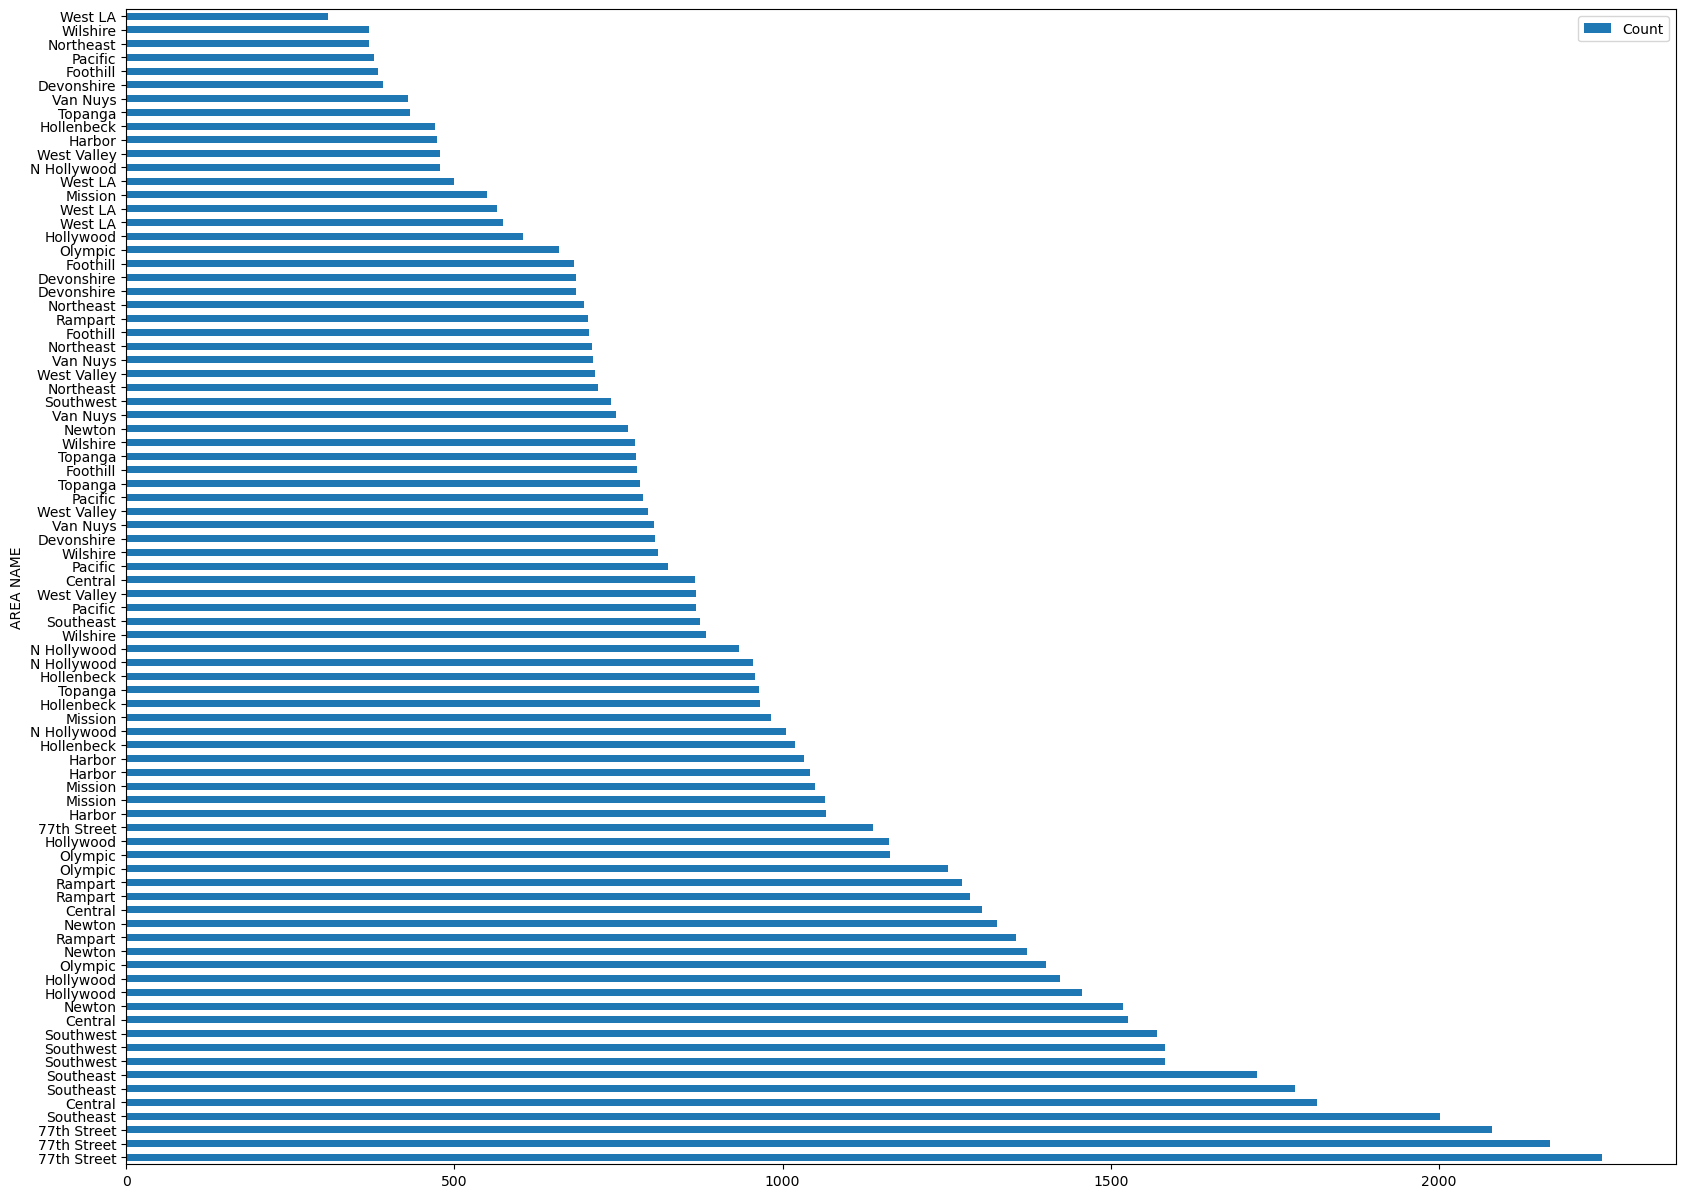

In [261]:
sorted_category_count.plot(kind='barh', figsize = (20,15), y='Count', x='AREA NAME')
print(sorted_category_count.dtypes)

AREA NAME    object
Category     object
year          int32
Count         int64
dtype: object


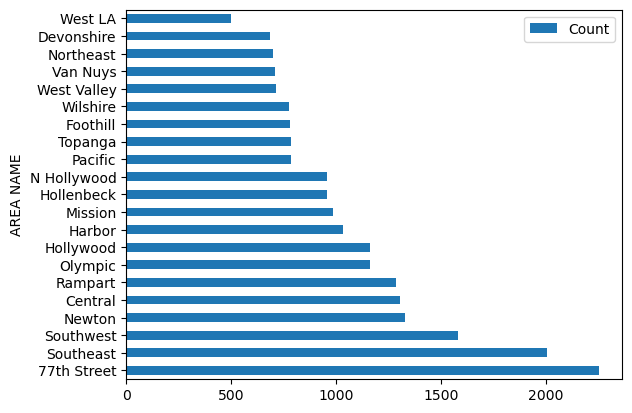

In [262]:
sorted_category_count_20 = sorted_category_count.loc[sorted_category_count['year']== 2020]
sorted_category_count_20.plot(kind='barh', y='Count', x='AREA NAME' )
print(sorted_category_count_20.dtypes)

AREA NAME    object
Category     object
year          int32
Count         int64
dtype: object


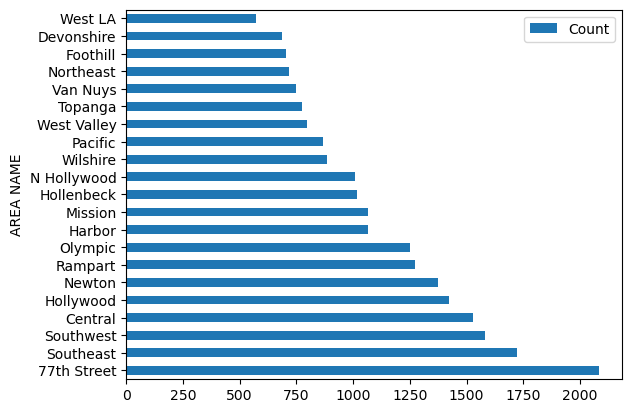

In [263]:
sorted_category_count_21 = sorted_category_count.loc[sorted_category_count['year']== 2021]
sorted_category_count_21.plot(kind='barh', y='Count', x='AREA NAME' )
print(sorted_category_count_21.dtypes)

In [266]:
# Assuming 'Year' is a column in your DataFrame
sorted_category_count = category_crime_count.sort_values(by='Count', ascending=False)

# Filter for violent crimes
violent_crimes = sorted_category_count[sorted_category_count['Category'] == 'violent']

# Group by year and sort within each group
grouped_by_year = violent_crimes.groupby('year')['2020','2021','2022'].apply(lambda x: x.sort_values(by='Count', ascending=False).head(5))

# Reset the index to a more readable format
grouped_by_year = grouped_by_year.reset_index(level=1, drop=True)

ValueError: Cannot subset columns with a tuple with more than one element. Use a list instead.